You are going to work with a dataset made up of Colon tissue images, taken from hisological slides (WSIs).


Your data folder, after been decompressed, would look like this:

    crc/
        Annotation 0
            AC
                1.png
                2.png
                [...]
        Annotation 1
            AC
                1.png
                2.png
                [...]
        Annotation 2
            H
                1.png
                2.png
                [...]
        [...]
Examples of filepath of a given image:

`filepath = crc/Annotation_0/AC/262.png`

`Annotation 0` 

    Corresponds to a specific patient. Note that more annotations can be assigned to the same patient
    This information can be obtained from "crc/patient2annotation.csv"
    

`AC`

    Is the label of interest. Globally, there are 3 labels: AC (Cancer), AD (Adenoma), H (Healthy)


Preprocessing:

1. Load the dataset stored in "crc.zip" in form of Pandas dataframe. Pandas dataframe allows a flexible management of all the needed information. Such dataframe, saved in the variable `dataset`, must look like this:
![title](images/CRC_df.png)
The info to fill `dataset` can be retrieved from the images' filepath and making use of `"crc/patient2annotation.csv"` to merge `Annotation j` to the corresponding patient.
To prepare `dataset` dataframe, exploit the set of vectorized string operations avaiable in Pandas. Avoid as much as possible slow loops on lists

# Import

In [1]:
import os
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from jupyterthemes import jtplot
jtplot.style(theme="onedork")
%matplotlib notebook
%config Completer.use_jedi = False #  To avoid that autocomplete taks too long

In [2]:
plt.rcParams["figure.facecolor"] = "#373e4b"

# Load images and .csv file

In [3]:
import requests, zipfile, io, pandas as pd

# Load zipped imagesm
filepath_zip = "../data/crc.zip"
archive = zipfile.ZipFile(filepath_zip, "r")
# archive.extractall(path="../data/")

# Load .csv file
patient2annotation_df = pd.read_csv("../data/crc/patient2annotation.csv")
patient2annotation_df = patient2annotation_df.drop(columns="Unnamed: 0")

# Get filepaths list of images
Here you can loop over rootpath to get all files

In [4]:
rootpath = "../data/crc/"
paths = []

# Walk the root directory tree
for (path, dirnames, filenames) in os.walk(rootpath):
    # Get the paths (if ".png")
    paths.extend(os.path.join(path, name).replace("\\", "/") for name in filenames if name.endswith(".png"))
    
print("Loaded " + str(len(paths)) + " files:\n\n" + "\n".join(paths))

Loaded 13500 files:

../data/crc/Annotation_0/AC/0.png
../data/crc/Annotation_0/AC/1.png
../data/crc/Annotation_0/AC/10.png
../data/crc/Annotation_0/AC/100.png
../data/crc/Annotation_0/AC/101.png
../data/crc/Annotation_0/AC/102.png
../data/crc/Annotation_0/AC/103.png
../data/crc/Annotation_0/AC/104.png
../data/crc/Annotation_0/AC/105.png
../data/crc/Annotation_0/AC/106.png
../data/crc/Annotation_0/AC/107.png
../data/crc/Annotation_0/AC/108.png
../data/crc/Annotation_0/AC/109.png
../data/crc/Annotation_0/AC/11.png
../data/crc/Annotation_0/AC/110.png
../data/crc/Annotation_0/AC/111.png
../data/crc/Annotation_0/AC/112.png
../data/crc/Annotation_0/AC/113.png
../data/crc/Annotation_0/AC/114.png
../data/crc/Annotation_0/AC/115.png
../data/crc/Annotation_0/AC/116.png
../data/crc/Annotation_0/AC/117.png
../data/crc/Annotation_0/AC/118.png
../data/crc/Annotation_0/AC/119.png
../data/crc/Annotation_0/AC/12.png
../data/crc/Annotation_0/AC/120.png
../data/crc/Annotation_0/AC/121.png
../data/crc/An

# Prepare dataframe from filepaths list
Exploit the set of vectorized string operations avaiable in Pandas. Avoid as much as possible slow loops on lists

In [5]:
# Create the dataframe from previously stored paths
data = pd.DataFrame(paths, columns=["Path"]).astype(str)

# Assign "Annotation" and "Label_3_classes" from previously stored paths
data[["Annotation", "Label_3_classes"]] = data["Path"].str.split("/", expand=True)[[3, 4]]

# Assign "Label_2_classes" based on "Label_3_classes"
data["Label_2_classes"] = np.nan
data.loc[data["Label_3_classes"] == "H", "Label_2_classes"] = "H"
data.loc[data["Label_3_classes"] != "H", "Label_2_classes"] = "Not-H"

# Convert "Label_2_classes" and "Label_3_classes" to numeric types
data["Label_2_classes_numerical"] = pd.to_numeric(data["Label_2_classes"].astype("category").cat.codes)
data["Label_3_classes_numerical"] = pd.to_numeric(data["Label_3_classes"].astype("category").cat.codes)

# Merge data exploiting "patient2annotation.csv"
data = data.merge(patient2annotation_df, on="Annotation")

# Sort data by "Annotation"
data["Sort"] = data["Annotation"].str.extract("(\d+)", expand=False).astype(int)
data.sort_values("Sort", inplace=True, ignore_index=True)
data.drop("Sort", axis=1)
data.drop("Annotation", inplace=True, axis=1)

# Re-arrange the dataframe
data.index.name = "Image id"
data = data[["Patient", "Label_3_classes", "Path", "Label_2_classes", "Label_3_classes_numerical", "Label_2_classes_numerical"]]

# Export to .csv (for "Assignment_Lab2.ipynb")
data.to_csv("../data/crc.csv", index = False)

data

,Patient,Label_3_classes,Path,Label_2_classes,Label_3_classes_numerical,Label_2_classes_numerical
Image id,,,,,,
0,P-2,AC,../data/crc/Annotation_0/AC/0.png,Not-H,0,1
1,P-2,AC,../data/crc/Annotation_0/AC/405.png,Not-H,0,1
2,P-2,AC,../data/crc/Annotation_0/AC/404.png,Not-H,0,1
3,P-2,AC,../data/crc/Annotation_0/AC/403.png,Not-H,0,1
4,P-2,AC,../data/crc/Annotation_0/AC/402.png,Not-H,0,1
...,...,...,...,...,...,...
13495,P-55,H,../data/crc/Annotation_30/H/243.png,H,2,0
13496,P-55,H,../data/crc/Annotation_30/H/242.png,H,2,0
13497,P-55,H,../data/crc/Annotation_30/H/241.png,H,2,0


# Load images and labels as numpy arrays for train and test folds
Use Pillow https://pillow.readthedocs.io/en/stable/reference/Image.html library to load images into a numpy array and to reshape each RGB image into (64, 64, 3)

In [6]:
from PIL import Image

images = np.array([np.array(Image.open(path).resize((64, 64))) for path in data["Path"]])

## Write a function to plot some random images, with the corresponding label as title
Output should look like this
![title](images/CRC_random_imgs.png)

<IPython.core.display.Javascript object>


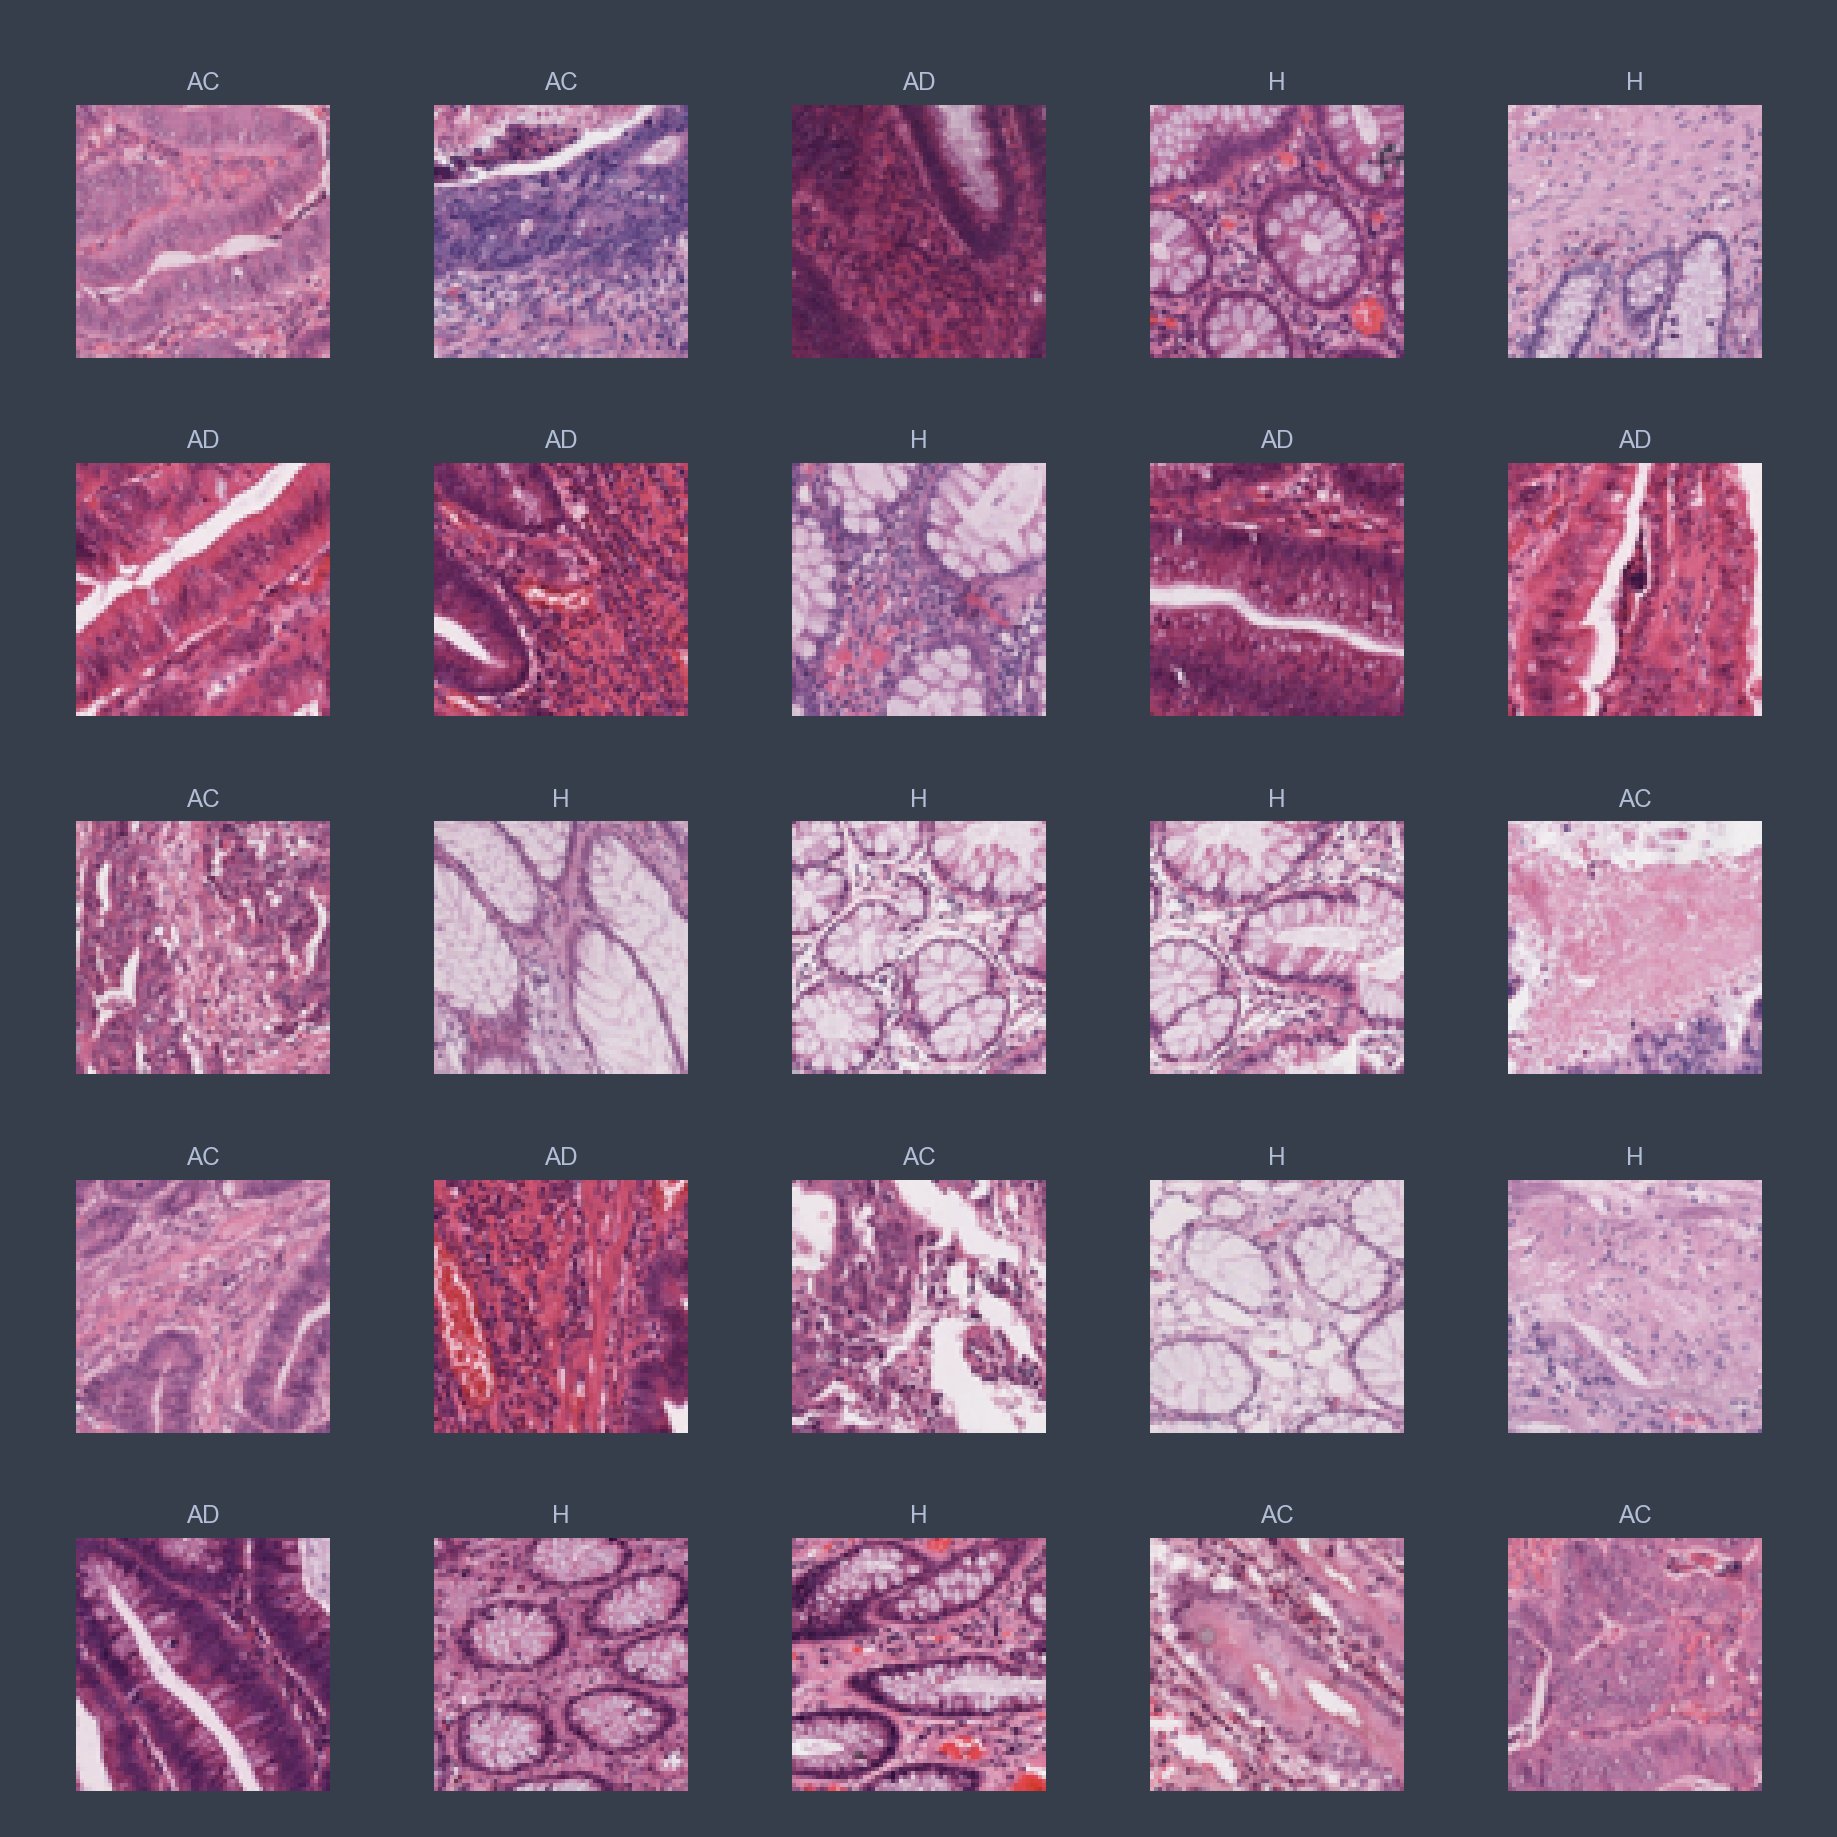

In [7]:
def random_images(rows, cols):
    # Create main figure
    fig = plt.figure(figsize=(6, 6))
    
    # Sample images
    sampled = np.random.choice(images.shape[0], size=rows*cols, replace=False)
    
    # Iterate to create a subplot for each image
    for i in range(0, rows * cols):
        fig.add_subplot(rows, cols, i + 1)
        plt.title(data["Label_3_classes"].iloc[sampled[i]], fontsize=10)
        plt.axis("off")
        plt.imshow(images[sampled[i]])
        
    # Tweak style (optional)
    plt.tight_layout()

# Call the function
random_images(5, 5)

# Load features in a numpy array

In [8]:
features = np.load("../data/features_A.npy")

# PCA

## PCA as a decorrelation method
**More often than not, features are correlated**. As an example, consider the case where we want to use the red, green and blue components of each pixel in an image to classify the image (e.g. detect dogs versus cats). Image sensors that are most sensitive to red light also capture some blue and green light. Similarly, sensors that are most sensitive to blue and green light also exhibit a certain degree of sensitivity to red light. As a result, the R, G, B components of a pixel are statistically correlated. Therefore, simply eliminating the R component from the feature vector, also implicitly removes information about the G and B channels. In other words, **before eliminating features, we would like to transform the complete feature space such that the underlying uncorrelated components are obtained**.

![title](images/correlated.png)


Concerning figure 1, we can do the following considerations:
* The features x and y are clearly correlated. In fact, their `covariance matrix` is:
$\Sigma=
\begin{bmatrix} 
16.87 & 14.94 \\
14.94 & 17.27\\
\end{bmatrix}
$
* The `covariance matrix` $\Sigma$ can be seen as a sequence of `rotation` $R$ and `scaling` $S$ operations, in one word as a `linear transformation matrix` $T$, which `fully describes the direction of the largest variance of the data`. For further details see [A geometric interpretation of the covariance matrix](https://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix).
* $T$ is completely defined by its eigenvectors and eigenvalues, therefore we can represent $\Sigma$ as a function of its eigenvectors and eigenvalues:
    * The rotation matrix is defined by the `eigenvectors` of this covariance matrix: the real eigenvector of a generic rotation matrix has a natural interpretation as the *axis of rotation*.
    * The eigenvalues correspond to the square of the scaling factor in each dimension.


Intuitively, it is easy to see that the data D shown in figure 1 can be decorrelated by rotating each data point such that the eigenvectors V become the new reference axes: $D'=VD$
![title](images/uncorrelated.png)

The covariance matrix of the resulting data is now diagonal, meaning that the new axes are uncorrelated:
$\Sigma'=
\begin{bmatrix} 
1.06 & 0.0 \\
0.0 & 1.06\\
\end{bmatrix}
$

## PCA as dimensinality reduction techinque

**Once the data is uncorrelated** (or *equivalently the principal components have been recovered*), it is allowed to reduce the dimensionality of the feature space by simply eliminating some features.
## But which features?!

If on one hand the eigenvectors of $\Sigma$ point in the direction of the largest variance of the data, the eigenvalues, as scaling factors, indicate the magnitude of the given direction: the largest eigenvalues represent the largest variance in the data.
But the question remains:now how many eigenvectors should be kept? Removing too many eigenvectors might remove important information from the feature space, whereas eliminating too few eigenvectors leaves us with the curse of dimensionality. Regrettably there is no straight answer to this problem. Although cross-validation techniques can be used to obtain an estimate of this hyperparameter, choosing the optimal number of dimensions remains a problem that is mostly solved in an empirical manner. 

It is often useful to check `how much (as a percentage) of the variance of the original data is kept while eliminating eigenvectors`. This is done by dividing the sum of the kept eigenvalues by the sum of all eigenvalues.

## PCA recipe
Based on the previous sections, we can now list the simple recipe used to apply PCA for feature extraction:
1. Center the data: 
we showed that the covariance matrix can be written as a sequence of linear operations (scaling and rotations). The eigendecomposition extracts these transformation matrices: the eigenvectors represent the rotation matrix, while the eigenvalues represent the scaling factors. However, the covariance matrix does not contain any information related to the translation of the data. Therefore, before applying PCA to rotate the data in order to obtain uncorrelated axes, `any existing shift needs to be countered by subtracting the mean of the data from each data point.` This simply corresponds to centering the data such that its average becomes zero.

2. Normalize the data: the eigenvectors of the covariance matrix point in the direction of the largest variance of the data. However, variance is an absolute number, not a relative one. This means that the variance of data, measured in centimeters will be much larger than the variance of the same data when measured in meters. Consider the example where one feature represents the length of an object in meters, while the second feature represents the width of the object in centimeters. The largest variance, and thus the largest eigenvector, will implicitly be defined by the first feature if the data is not normalized. To avoid this scale-dependent nature of PCA, it is useful to normalize the data by dividing each feature by its standard deviation. This is especially important if different features correspond to different metrics.

3. Calculate the eigendecomposition: since the data will be projected onto the largest eigenvectors to reduce the dimensionality, the eigendecomposition needs to be obtained. One of the most widely used methods to efficiently calculate the eigendecomposition is Singular Value Decomposition (SVD).
4. Project the data: to reduce the dimensionality, the data is simply projected onto the largest eigenvectors. Let V be the matrix whose columns contain the largest eigenvectors and let D be the original data whose <u>rows</u> contain the different <u>observations</u>. We can think for a given observation (i.e. sample) as a N-dimensional array that we want to project on another basis. The projected data $D'$ is obtained as $D' = DV$, where $V$ is the matrix of the eigenvectors (coulm 1 $ \rightarrow$ first eigenvector, and so on). 
5. Thus, we can either choose the number of remaining dimensions, i.e. the columns of V, directly, or we can define the amount of variance of the original data that needs to kept while eliminating eigenvectors. If only $N$ eigenvectors are kept, and $e_1...e_N$ represent the corresponding eigenvalues, then the amount of variance that remains after projecting the original d-dimensional data can be calculated as:
$\begin{equation}
s = \frac{\sum_{i=0}^N e_i}{\sum_{j=0}^d e_j}
\end{equation}$


## PCA from scratch
Here you will implement PCA from scratch

Then, plot first 3 Principal component in a 3D interactive scatter plot, making use of `%matplotlib notebook`

Examples of the plot
![title](images/CRC_features.png)

<IPython.core.display.Javascript object>


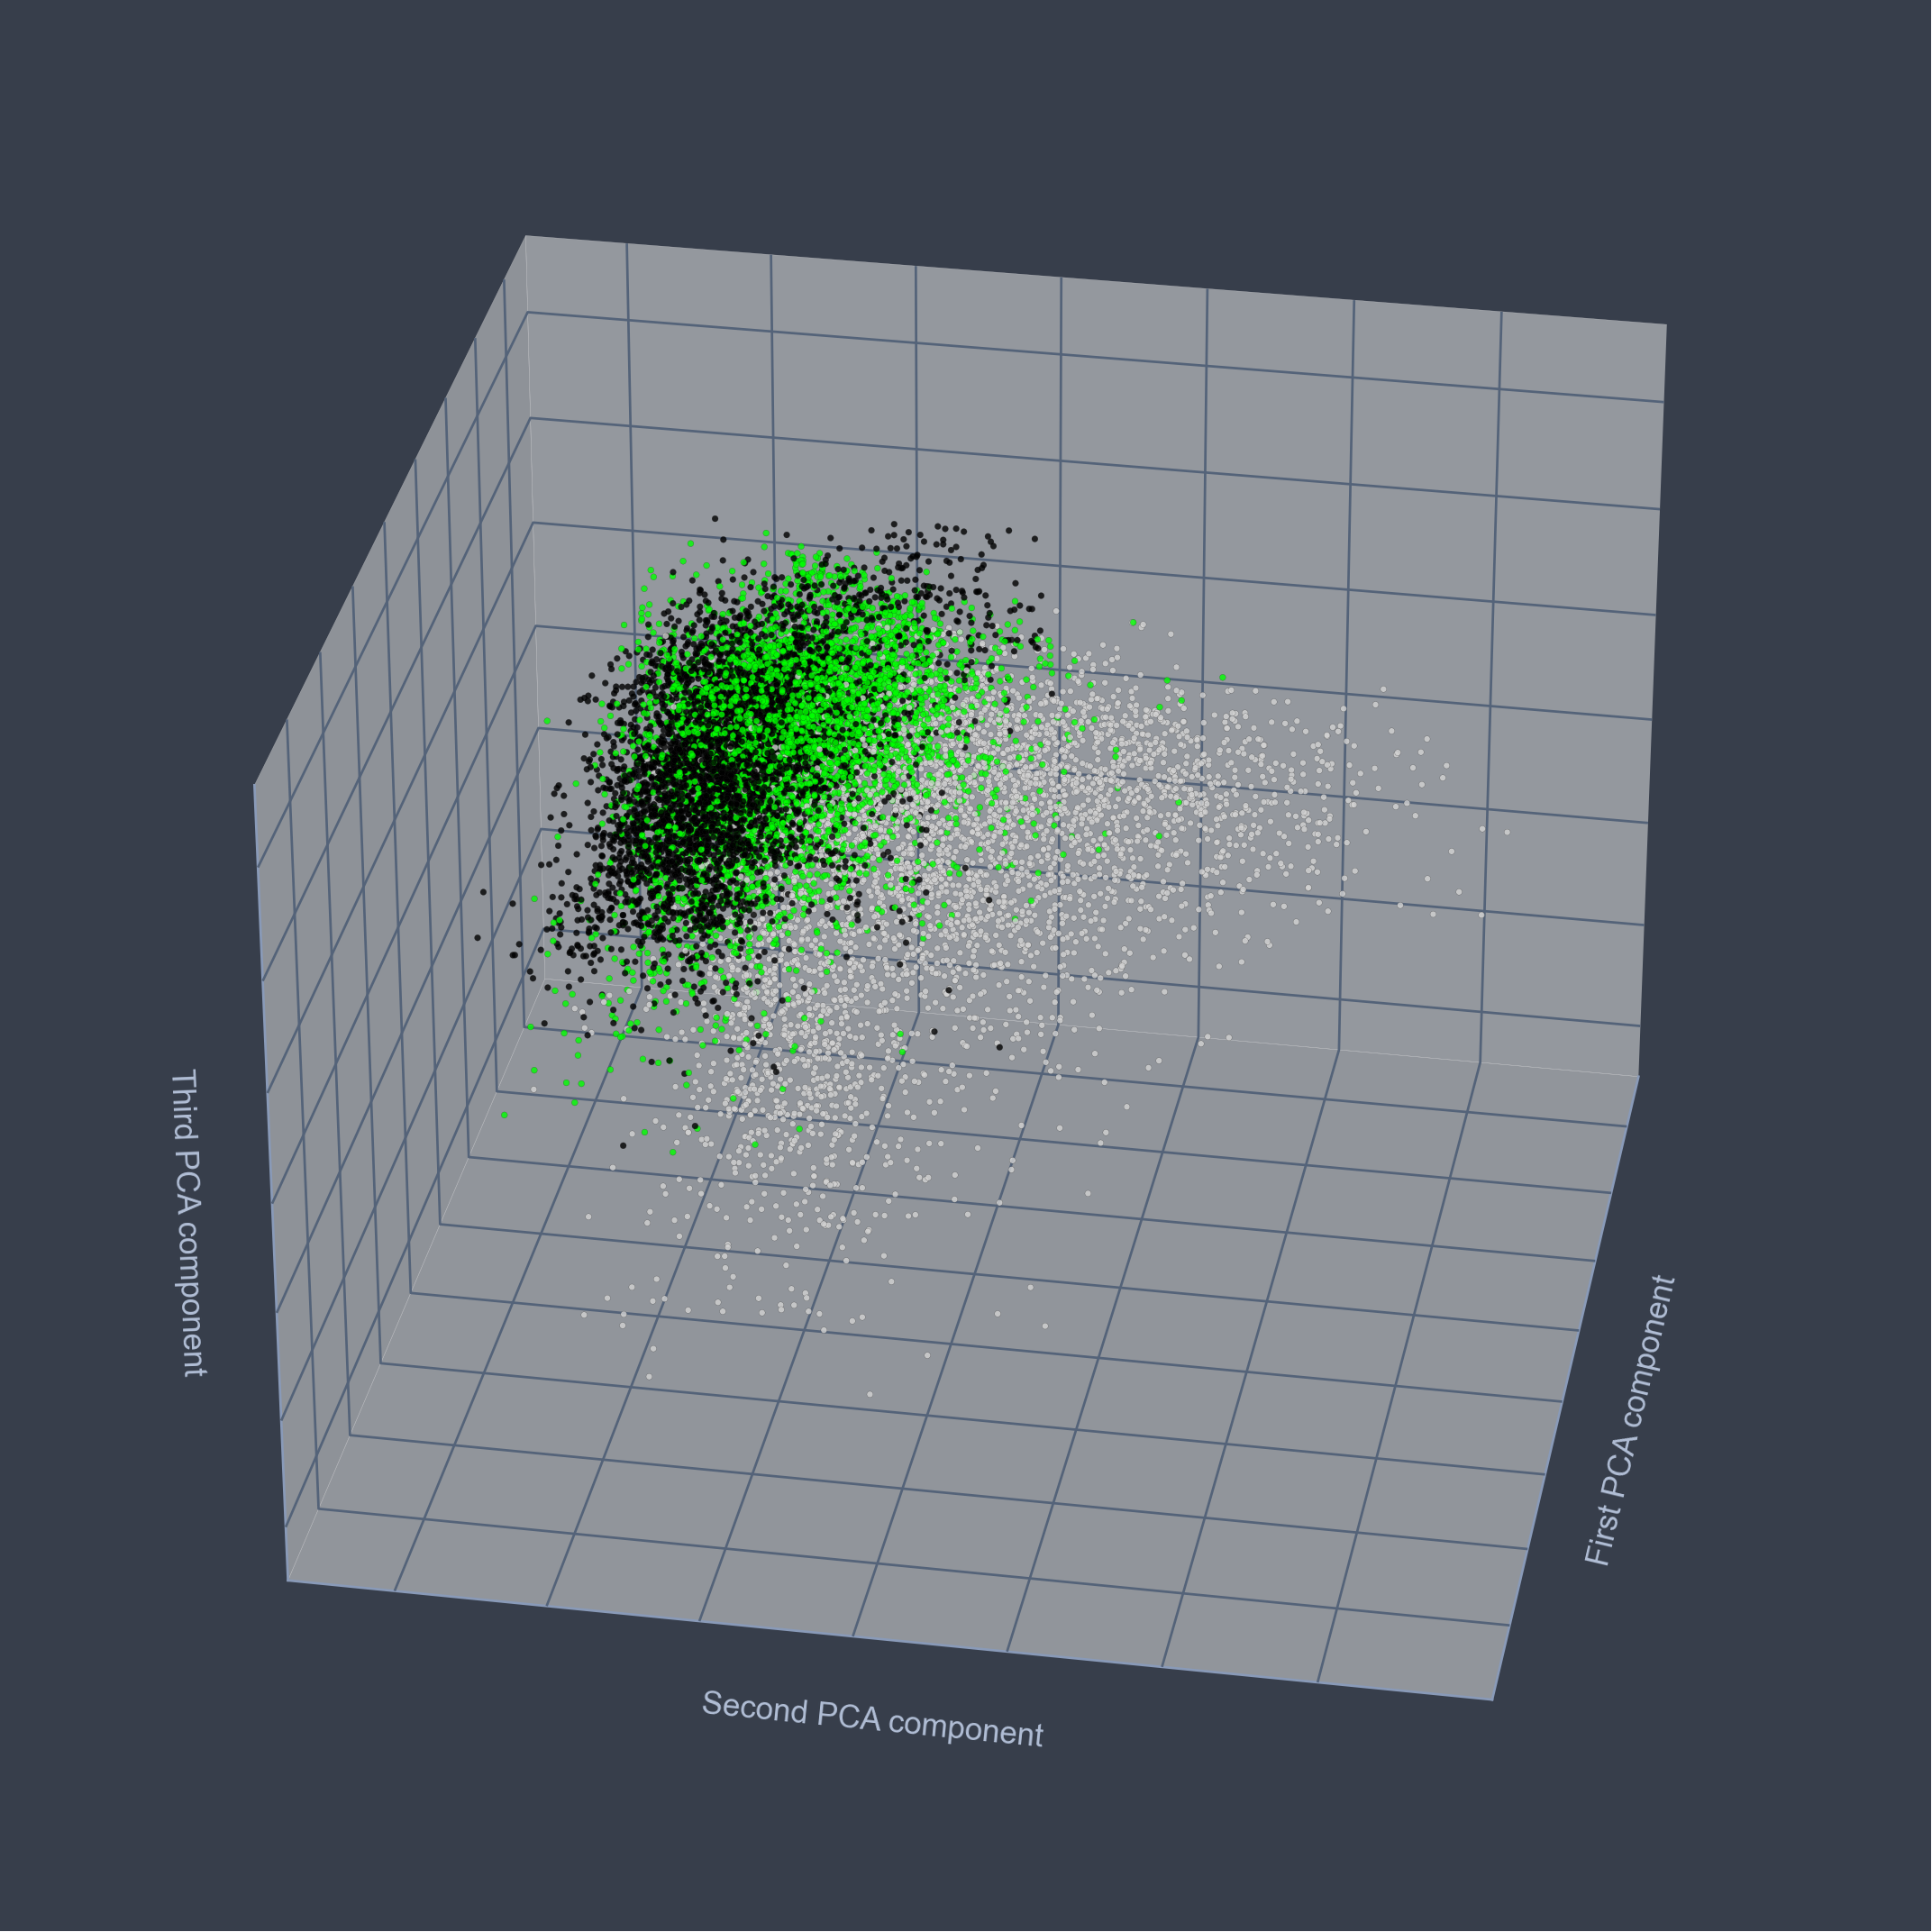

In [9]:
# --------------------------------------------- PCA ---------------------------------------------
# 1 - Center the data
mean = np.mean(features, axis = 0)
centered = features - mean

# 2 - Normalize the data
std = np.std(features, axis = 0)
normalized = centered / std

# 3 - Calculate the eigendecomposition
covariance = np.cov(normalized.T)
eigenvalues, eigenvectors = np.linalg.eig(covariance)

# 4 - Project the data
projected = np.dot(normalized, eigenvectors)

# --------------------------------------------- Plot --------------------------------------------
# Map data colors
mapping = { "H": "black", "AD": "lightgrey", "AC": "lime" }
colors = data["Label_3_classes"].apply(lambda x: mapping[x])

# Generate plot
fig = plt.figure(figsize=(7, 7))
axes = plt.axes(projection="3d")
axes.scatter(projected[:, 0], projected[:, 1], projected[:, 2], c=colors, alpha=0.8, edgecolor="k", linewidth=0.1, s=8)
axes.set(xlabel="First PCA component", ylabel="Second PCA component", zlabel="Third PCA component")
axes.view_init(elev=30, azim=-170)

# Tweak style (optional)
axes.tick_params(axis="x", colors=(0, 0, 0, 0))
axes.tick_params(axis="y", colors=(0, 0, 0, 0))
axes.tick_params(axis="z", colors=(0, 0, 0, 0))
plt.tight_layout()

## Plot the cumulative variance explained by PCA with an horizontal red bar to mark 95% of explained variance.
Example of the plot
![title](images/CRC_explained_var.png)

<IPython.core.display.Javascript object>


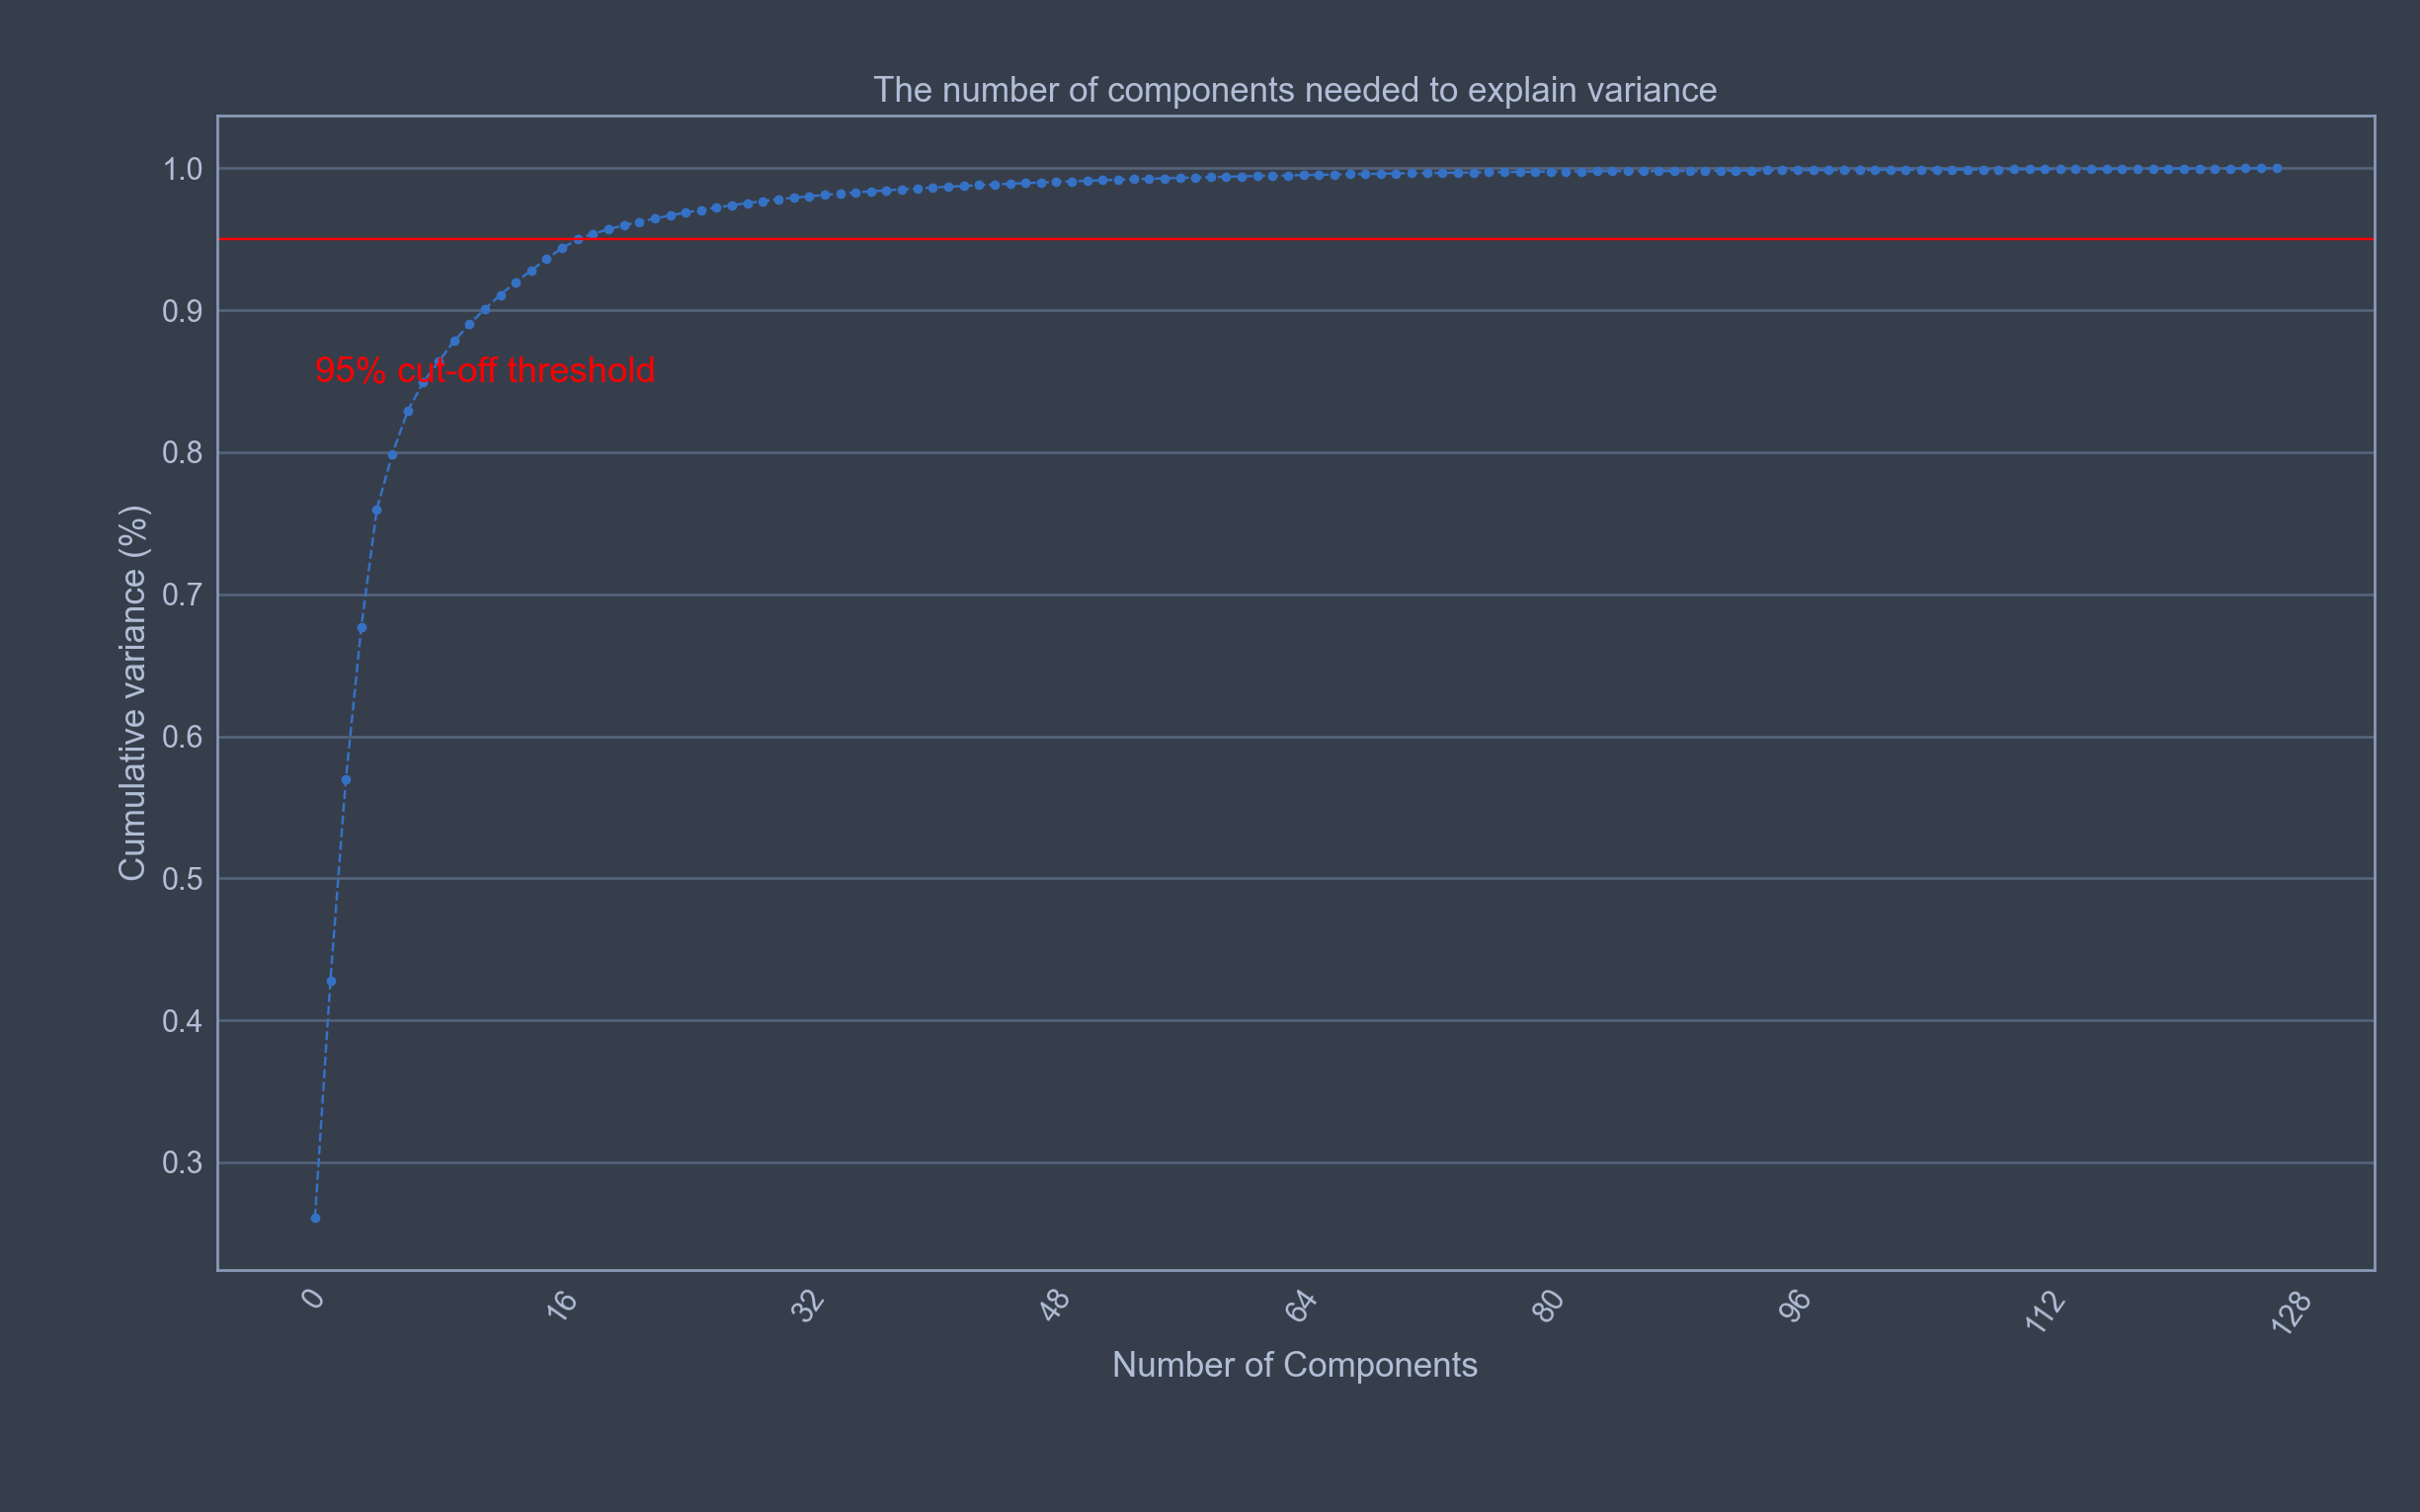

In [10]:
# ----------------------------------- Cumulative variance -----------------------------------
cumulative_variance = np.cumsum(eigenvalues / eigenvalues.sum())

# ------------------------------------------- Plot ------------------------------------------
# Generate plot
fig, ax = plt.subplots(figsize=(8, 5))
axes = plt.plot(cumulative_variance, linestyle="--", linewidth=1, marker="o", markersize=4)

# Define plot information
plt.xlabel("Number of Components")
plt.xticks([i for i in range(0, 129, 16)], rotation=55)
plt.ylabel("Cumulative variance (%)")
plt.title("The number of components needed to explain variance")
ax.annotate("95% cut-off threshold", (0, 0.85), c="red", fontsize=15)
ax.axhline(0.95, c="red", linewidth=1)
ax.xaxis.grid()

# Tweak style (optional)
plt.tight_layout()

## Compute PCA via scikitlearn, plot again cumulative  explained_variance_ratio, leveraging PCA scikitlearn attributes

<IPython.core.display.Javascript object>


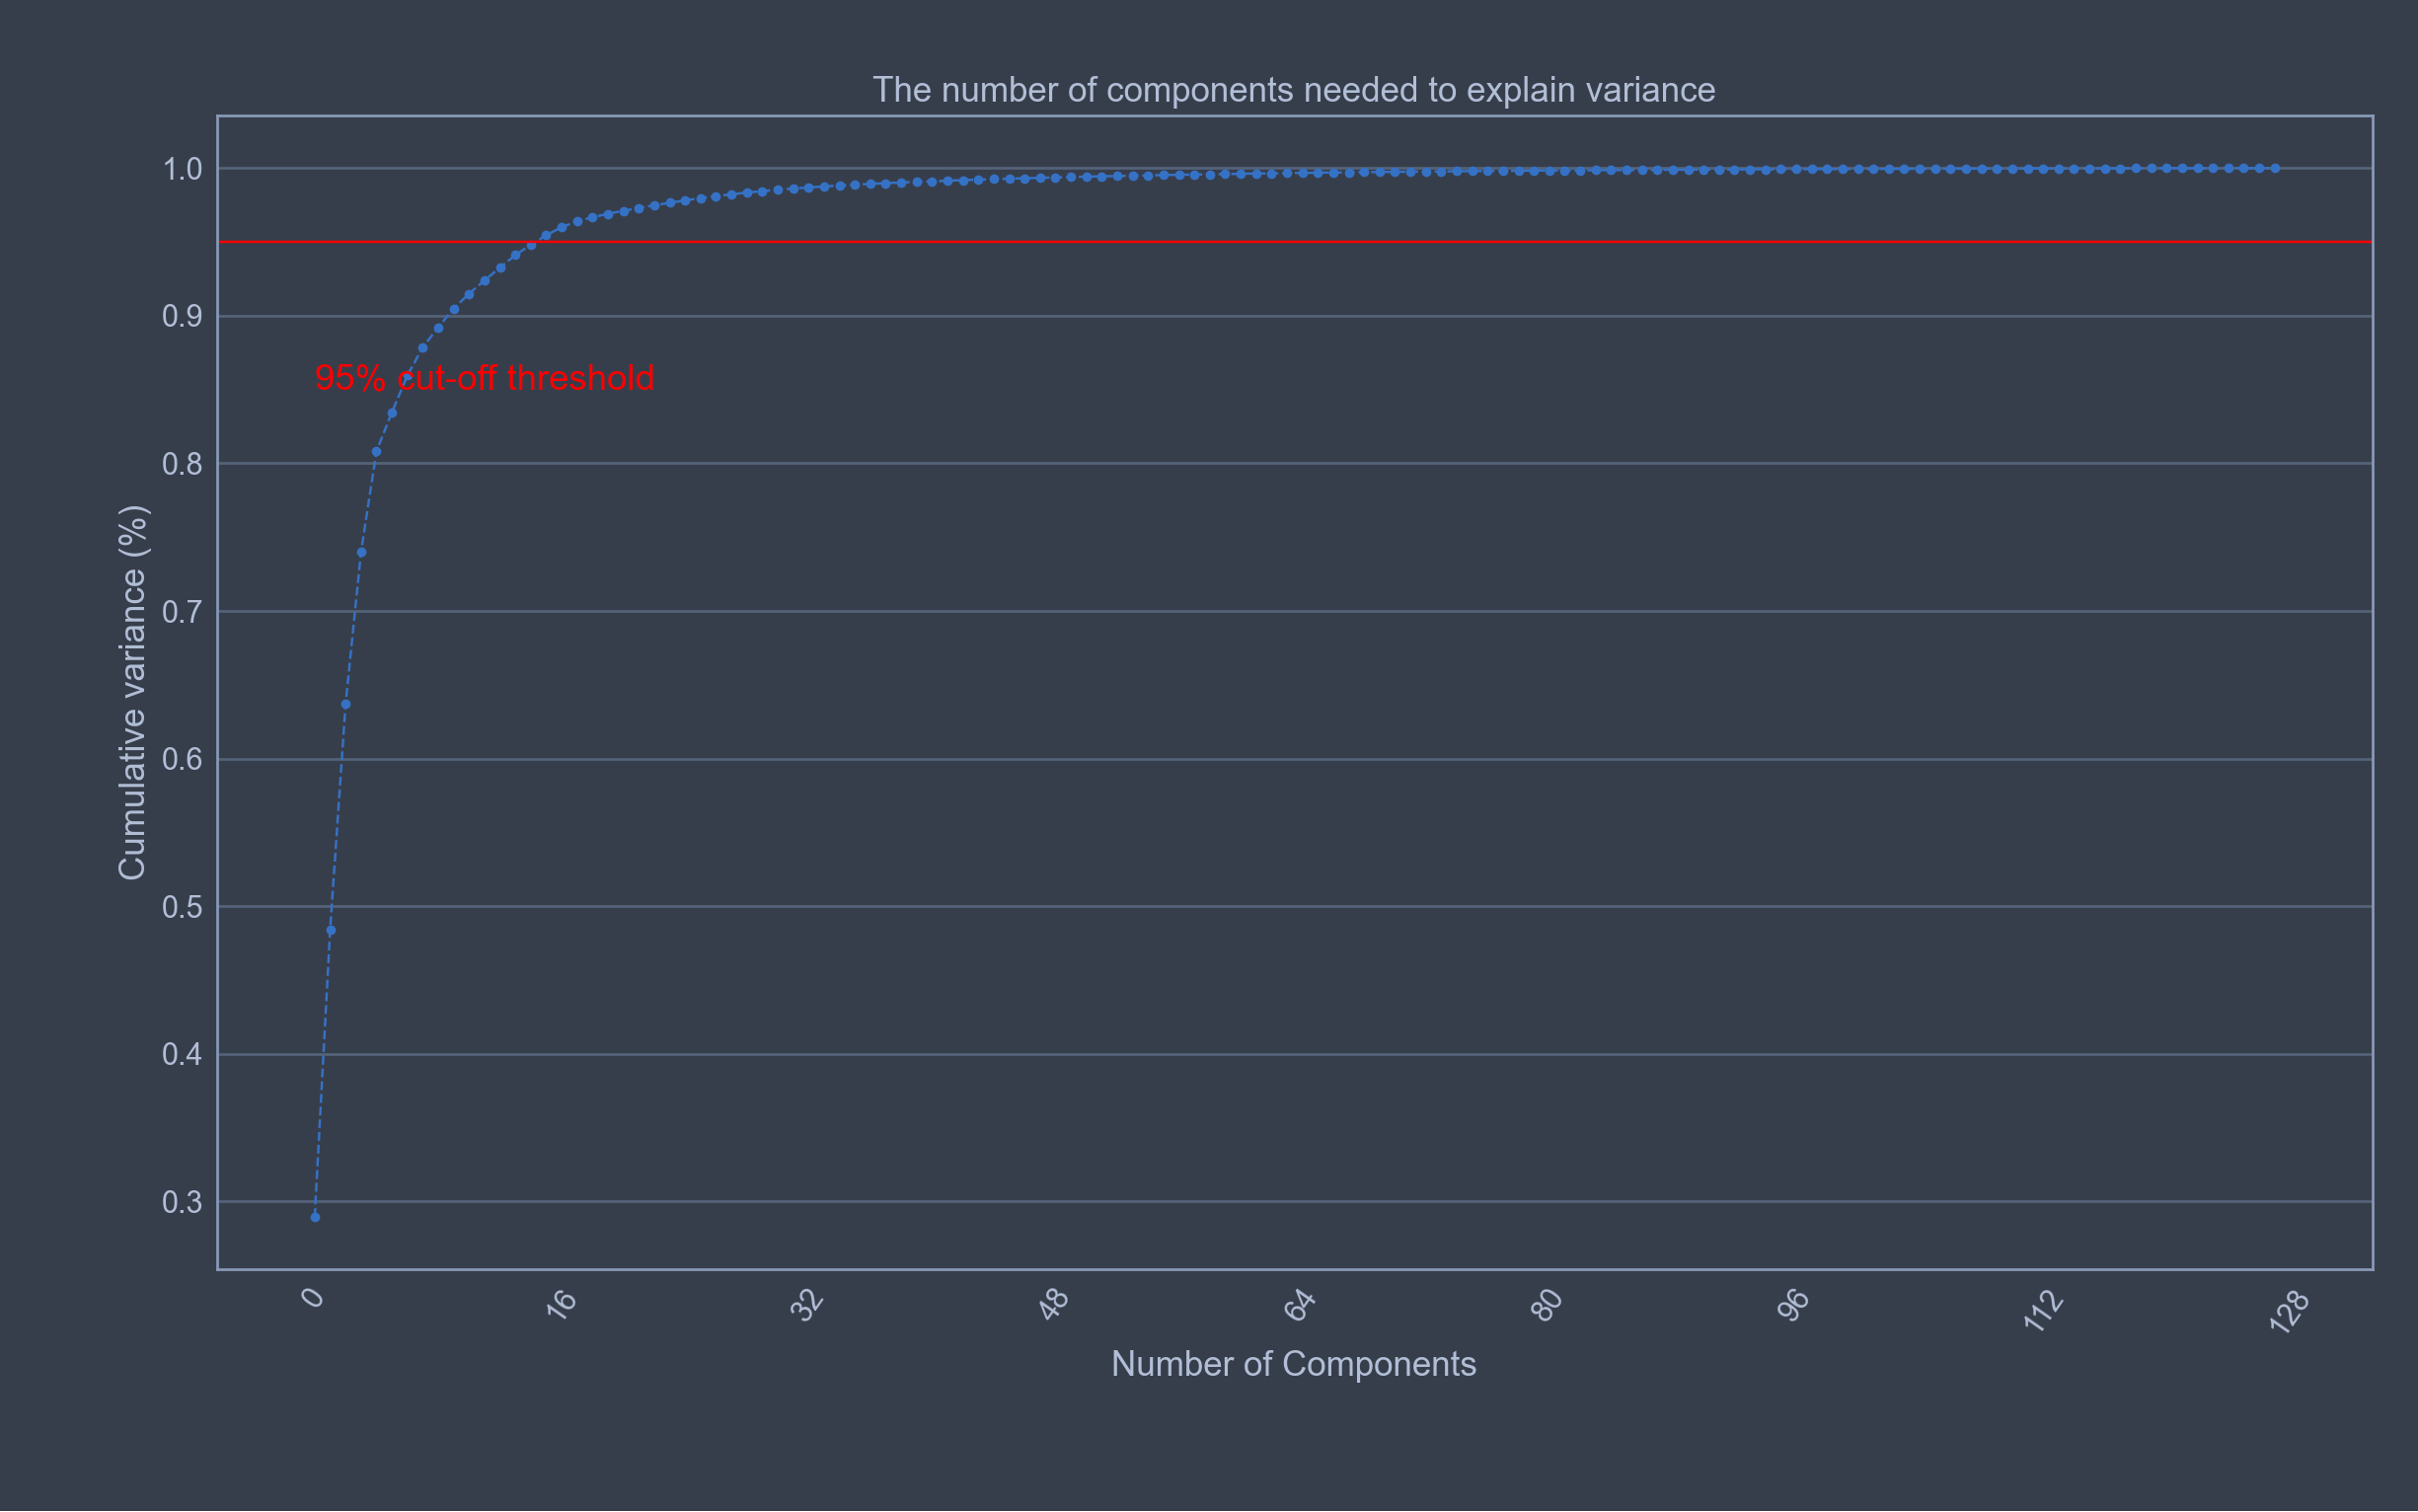

In [11]:
# --------------------------------------------- PCA ---------------------------------------------
from sklearn.decomposition import PCA

pca = PCA().fit(features)

# ------------------------------------- Cumulative variance -------------------------------------
cumulative_variance_scikit = np.cumsum(pca.explained_variance_ratio_)

# ------------------------------------------- Plot ------------------------------------------
# Generate plot
fig, ax = plt.subplots(figsize=(8, 5))
axes = plt.plot(cumulative_variance_scikit, linestyle="--", linewidth=1, marker="o", markersize=4)

# Define plot information
plt.xlabel("Number of Components")
plt.xticks([i for i in range(0, 129, 16)], rotation=55)
plt.ylabel("Cumulative variance (%)")
plt.title("The number of components needed to explain variance")
ax.annotate("95% cut-off threshold", (0, 0.85), c="red", fontsize=15)
ax.axhline(0.95, c="red", linewidth=1)
ax.xaxis.grid()

# Tweak style
plt.tight_layout()